In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

In [8]:

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'dismal'
date = 'date'

df = pd.read_csv(f'data_{station}/{station}_raw.csv')
cols = [col for col in df.columns]


df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316824 entries, 0 to 316823
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   date            316824 non-null  datetime64[ns, UTC]
 1   identificacion  308886 non-null  float64            
 2   dir             308886 non-null  float64            
 3   dddstd          308886 non-null  float64            
 4   dddx            308886 non-null  float64            
 5   hr              308886 non-null  float64            
 6   prec            201726 non-null  float64            
 7   pres            200799 non-null  float64            
 8   temp            203918 non-null  float64            
 9   skt             178495 non-null  float64            
 10  vel             210793 non-null  float64            
 11  velx            210011 non-null  float64            
 12  qdato           308886 non-null  float64            
dtypes: datetime64[

### Uniformamos el dataset

-Eliminamos las columnas que no nos interesen

-Fijamos la columan de fecha

In [9]:
columns_to_drop = [
    'identificacion', 'dddstd', 'dddx', 'velx', 'qdato']

df_2 = df.drop(columns=columns_to_drop)

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316824 entries, 0 to 316823
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    316824 non-null  datetime64[ns, UTC]
 1   dir     308886 non-null  float64            
 2   hr      308886 non-null  float64            
 3   prec    201726 non-null  float64            
 4   pres    200799 non-null  float64            
 5   temp    203918 non-null  float64            
 6   skt     178495 non-null  float64            
 7   vel     210793 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 19.3 MB


In [18]:
df_2['date'] = df_2['date'].apply(lambda x: x if ':' in str(x) else str(x) + ' 00:00:00')
df_2['date'].head()

df_2['date'] = pd.to_datetime(df_2['date'])

0   2006-01-02 00:00:00+00:00
1   2006-01-02 01:00:00+00:00
2   2006-01-02 02:00:00+00:00
3   2006-01-02 03:00:00+00:00
4   2006-01-02 04:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316824 entries, 0 to 316823
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    316824 non-null  datetime64[ns, UTC]
 1   dir     308886 non-null  float64            
 2   hr      308886 non-null  float64            
 3   prec    201726 non-null  float64            
 4   pres    200799 non-null  float64            
 5   temp    203918 non-null  float64            
 6   skt     178495 non-null  float64            
 7   vel     210793 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 19.3 MB


In [11]:
#Recuento de nulos

df_2.isnull().sum()

date         0
dir       7938
hr        7938
prec    115098
pres    116025
temp    112906
skt     138329
vel     106031
dtype: int64

In [14]:
# Recuento de fechas duplicadas
duplicates = df_2.duplicated(subset='date', keep='first').sum()

duplicates

0

### Reindexación de las columnas

In [15]:
new_order = ['date', 'temp', 'skt', 'dir', 'vel', 'hr', 'prec', 'pres']
df = df.reindex(columns=new_order)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316824 entries, 0 to 316823
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    316824 non-null  datetime64[ns, UTC]
 1   temp    203918 non-null  float64            
 2   skt     178495 non-null  float64            
 3   dir     308886 non-null  float64            
 4   vel     210793 non-null  float64            
 5   hr      308886 non-null  float64            
 6   prec    201726 non-null  float64            
 7   pres    200799 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 19.3 MB


### Visualizacion de los datos

dir ---> <class 'str'>
hr ---> <class 'str'>
prec ---> <class 'str'>
pres ---> <class 'str'>
temp ---> <class 'str'>
skt ---> <class 'str'>
vel ---> <class 'str'>


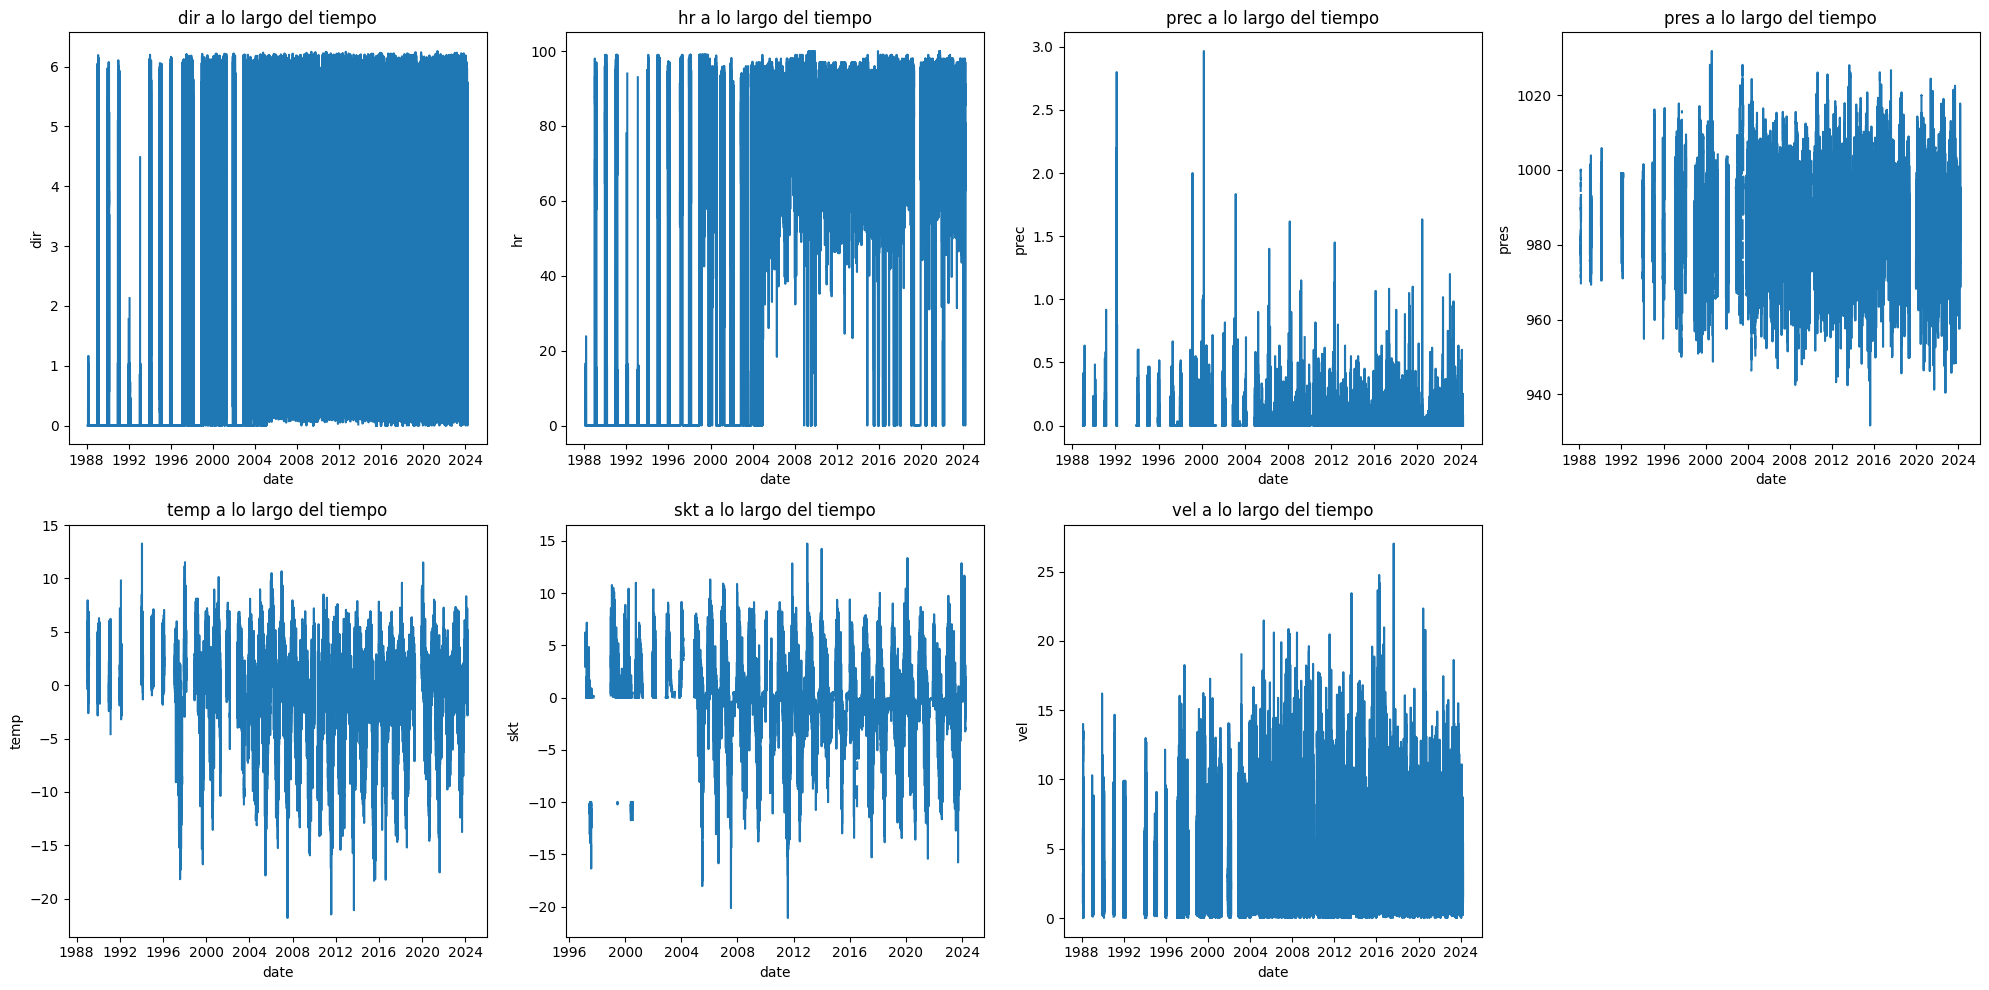

In [16]:


num_cols = len(df_2.columns) - 1  
num_rows = math.ceil(num_cols / 4)  


fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df_2.columns.drop(date)):
    print(col, '--->' ,type(df_2[col]))
    df_2[col] = pd.to_numeric(df_2[col], errors='coerce')
    ax.plot(df_2['date'], df_2[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo del tiempo')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

In [ ]:
df_2.to_csv(f'data_{station}/{station}_clean.csv', index=False)